In [1]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(),'..','..','..'))
from ursse.hydra_harp_file_reader import HydraHarpFile
from ursse.LED_tests.data_analyzis import calc_Fano, get_time_window_hist, calc_Fano_from_counts_per_time_window
import numpy as np
import pandas as pd
import seaborn as sns
from ursse.data_processing import \
    get_event_delays, plot_arrival_time_hist, get_events_array, get_fanos, \
    plot_fanos_hist, process_file, read_event_delays, save_event_delays
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams.update({'font.size': 24,'legend.fontsize':24})
import ursse.path_assistant as path_assistant
shift_02_28_2020 = path_assistant.PathAssistant('shift_02_28_2020', ignore_files=['background_000.ptu'])
shift_02_28_2020.show_time_stamp_file_names()
time_stamp_files_dir = shift_02_28_2020.get_time_stamp_files_dir()

0 11el_000.ptu
1 11el_001.ptu
2 1el_000.ptu
3 1el_001.ptu
4 1el_002.ptu
5 2el_000.ptu
6 2el_001.ptu
7 32el_000.ptu
8 32el_001.ptu
9 3el_000.ptu
10 3el_001.ptu
11 4el_000.ptu
12 4el_001.ptu
13 5el_000.ptu
14 5el_001.ptu


In [2]:
file_name = '1el_002.ptu'
df, n_revolutions = read_event_delays(shift_02_28_2020.get_time_stamp_file_path(file_name))
t_delays = df.delay

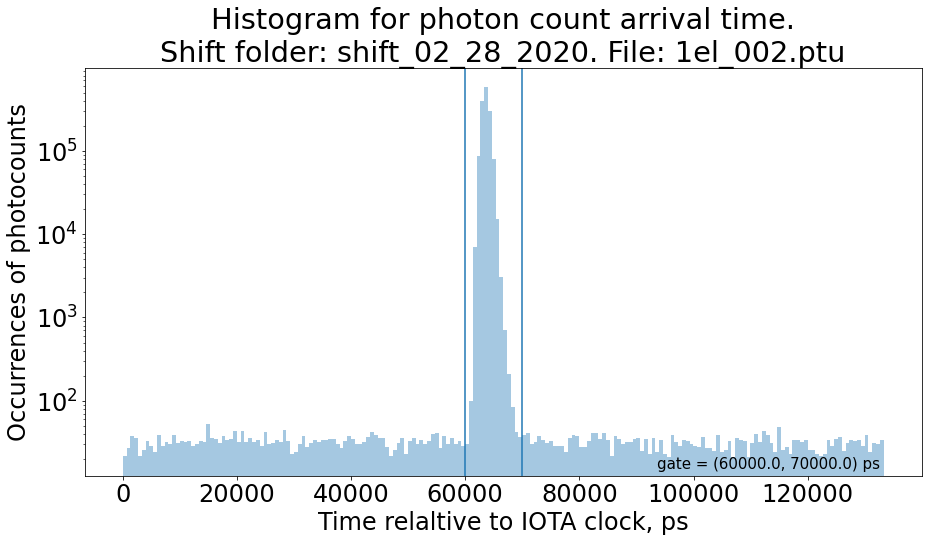

In [3]:
gate = (60000,70000)
plot_arrival_time_hist(t_delays, gate, bins=200, shift_folder_name=shift_02_28_2020.shift_folder_name,
    time_stamp_file_name=file_name)

In [4]:
events = get_events_array(df, n_revolutions, gate)
events

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [13]:
np.sum(events)

1484118

In [10]:
fanos, report = get_fanos(events, n_revolutions, n_of_chunks=1000)

p_measured = 0.0032971284026122936
chunk_length = 450124
n_events = 1484118
fano_interval = (-0.0033879553189789524, -0.0032102265153594045)
fano_interval_percentiles = (0.16, 0.84)
fano_median = -0.003296869307124195
fano_mean = -0.003297129235499584
absolute_fano_error = 8.886440180977395e-05


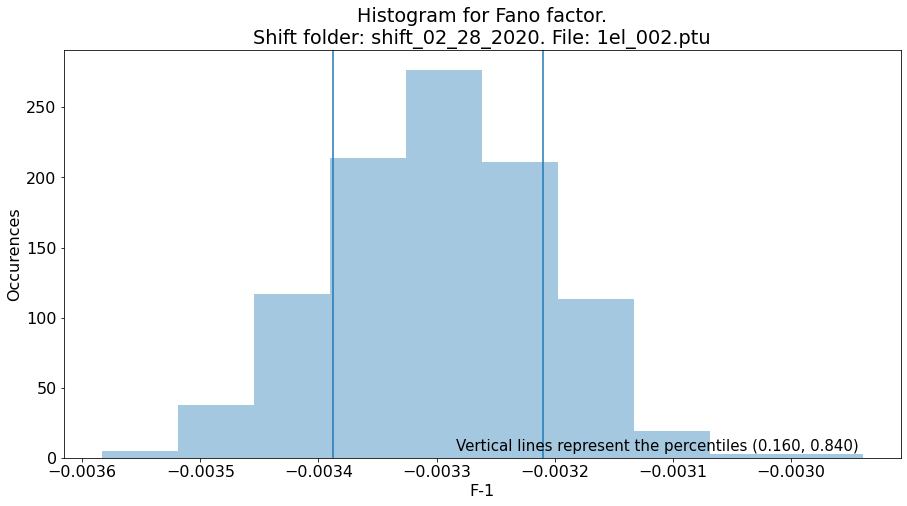

In [12]:
plot_fanos_hist(fanos, report, bins=10, shift_folder_name=shift_02_28_2020.shift_folder_name,
    time_stamp_file_name=file_name)

In [23]:
sum(fanos == np.nan)

0